In [218]:
import warnings
warnings.filterwarnings('ignore')

In [219]:
import numpy as np
import os
import pandas as pd
from pathlib import Path
from collections import Counter

In [220]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [221]:
columns = ["id","title","budget","genre","popularity","release_date","revenue","runtime","vote_average"]
    


target = ["revenue"]

In [222]:
revenue =df["revenue"].tolist()
revenue

[3897569.0,
 3897569.0,
 118063304.0,
 118063304.0,
 118063304.0,
 118063304.0,
 118063304.0,
 169837010.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19294901.0,
 19294901.0,
 41382841.0,
 41382841.0,
 41382841.0,
 41382841.0,
 29999213.0,
 42724017.0,
 42724017.0,
 42724017.0,
 42724017.0,
 0.0,
 14010832.0,
 14010832.0,
 14010832.0,
 3500000.0,
 3500000.0,
 3500000.0,
 3500000.0,
 3500000.0,
 0.0,
 0.0,
 42721196.0,
 42721196.0,
 42721196.0,
 377350553.0,
 377350553.0,
 377350553.0,
 377350553.0,
 377350553.0,
 110996879.0,
 113006880.0,
 113006880.0,
 113006880.0,
 113006880.0,
 113006880.0,
 0.0,
 66673516.0,
 66673516.0,
 66673516.0,
 95714875.0,
 71154592.0,
 71154592.0,
 38159905.0,
 38159905.0,
 38159905.0,
 38159905.0,
 38159905.0,
 50871113.0,
 50871113.0,
 62646763.0,
 62646763.0,
 62646763.0,
 9898412.0,
 9898412.0,
 9898412.0,
 59192128.0,
 714766572.0,
 714766572.0,
 714766572.0,
 0.0,
 0.0,
 9584131.0,
 9584131.0,
 9584131.0,
 0.0,
 66976317.0,
 66976317.0,
 66976317.0,
 66976317.0

In [223]:
# Load the data
file_path = Path('movie_data.csv')
df = pd.read_csv(file_path,)
df = df.loc[:,columns].copy()

# Drop the null columns where all values are null
movies_df = df.dropna(axis='columns', how='all')

# Drop the null rows
movies_df = df.dropna()

# Convert the target column values to low_Earners and high_Earners based on their values
#x = {'Current': 'low_earner'}   
#df = df.replace(x)
   
#x = dict.fromkeys(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'In Grace Period'], 'high_earner')    
#df = df.replace(x)

#df.reset_index(inplace=True, drop=True)




df.head()

,id,title,budget,genre,popularity,release_date,revenue,runtime,vote_average
0,100,"Lock, Stock and Two Smoking Barrels",1350000,Crime,4.60786,1998-03-05,3897569.0,105.0,7.5
1,100,"Lock, Stock and Two Smoking Barrels",1350000,Comedy,4.60786,1998-03-05,3897569.0,105.0,7.5
2,10003,The Saint,68000000,Action,10.97633,1997-04-03,118063304.0,116.0,5.9
3,10003,The Saint,68000000,Adventure,10.97633,1997-04-03,118063304.0,116.0,5.9
4,10003,The Saint,68000000,Science Fiction,10.97633,1997-04-03,118063304.0,116.0,5.9


In [224]:
mean_revenue=df["revenue"].mean()
mean_revenue

65358375.04014965

Split the Data into Training and Testing

In [225]:
# Create our features
X = movies_df.drop(["revenue","id"], axis=1)

X = pd.get_dummies(X)

# Create our target
y = movies_df["revenue"]

In [226]:
X.describe()

,budget,popularity,runtime,vote_average,title_#Horror,title_(500) Days of Summer,title_.45,title_1. Mai – Helden bei der Arbeit,title_10 Cloverfield Lane,title_10 Days in a Madhouse,...,release_date_2017-07-11,release_date_2017-07-19,release_date_2017-07-20,release_date_2017-07-26,release_date_2017-07-28,release_date_2017-08-03,release_date_2017-08-04,release_date_2017-10-27,release_date_2018-03-01,release_date_2018-12-31
count,2.190500e+04,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,...,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000,21905.000000
mean,2.551612e+07,8.066245,106.838347,6.053947,0.000183,0.000137,0.000137,0.000046,0.000137,0.000046,...,0.000137,0.000228,0.000137,0.000091,0.000457,0.000411,0.000091,0.000091,0.000183,0.000091
std,3.798007e+07,13.034695,28.544919,1.138666,0.013512,0.011702,0.011702,0.006757,0.011702,0.006757,...,0.011702,0.015107,0.011702,0.009555,0.021362,0.020266,0.009555,0.009555,0.013512,0.009555
min,1.000000e+00,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.745000e+06,2.727017,92.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000e+07,6.865513,102.000000,6.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000e+07,10.586815,117.000000,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,547.488298,705.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
X.shape

(21905, 14112)

In [228]:
# Check the balance of our target values
y.value_counts()

0.0           7858
12000000.0      45
2000000.0       41
10000000.0      37
11000000.0      35
              ... 
33828318.0       1
18599102.0       1
11806119.0       1
46770602.0       1
5731103.0        1
Name: revenue, Length: 4998, dtype: int64

In [229]:
# splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Random Forest Regressor

In [230]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)


(17524, 14112) (4381, 14112) (17524,) (4381,)


In [231]:
print(y_train.shape)

(17524,)


In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
random_forest = RandomForestRegressor(n_estimators = 25, random_state =25)

In [234]:
#Fitting the model
Revenue_rf= random_forest.fit(X_train, y_train)

In [235]:
#Training model evaluation

In [236]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [237]:
# The training r_sq
print('The training r_sq is: %.2f'% Revenue_rf.score(X_train, y_train))

The training r_sq is: 0.99


In [238]:
# Prediction on the training dataset
ytrain_pred = Revenue_rf.predict(X_train)

In [239]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))

The MAE is: 4275755.29


In [240]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_train, ytrain_pred))

The MSE is: 156860791161045.12


In [241]:
# THe RMSE
import numpy as np
print('The RME is %.2f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))

The RME is 12524407.82


In [242]:
# The EVS 
print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))

The EVS is: 0.99


In [243]:
#Prediction on the testing data
ytest_pred = Revenue_rf.predict(X_test)

In [244]:
print(ytest_pred[:10])

[1.02420060e+06 7.18092040e+06 8.13364640e+05 6.08198820e+06
 1.82400000e+01 0.00000000e+00 0.00000000e+00 6.81092637e+07
 0.00000000e+00 6.19616598e+08]


In [245]:
#The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, ytest_pred))

The testing r_sq is: 0.95


In [246]:
# Or
print('The testing r_sq is: %.2f'% Revenue_rf.score(X_test, y_test))

The testing r_sq is: 0.95


In [247]:
# The metrics

In [248]:
# The MAE
print('The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))

The MAE is: 11101930.84


In [249]:
# The MSE
print('The MSE is: %.2f'% mean_squared_error(y_test, ytest_pred))

The MSE is: 981532709870926.50


In [250]:
# The RMSE
print('The RMSE:',np.sqrt(mean_squared_error(y_test, ytest_pred)))

The RMSE: 31329422.43117365


In [251]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS is: 0.95


<function matplotlib.pyplot.show(close=None, block=None)>

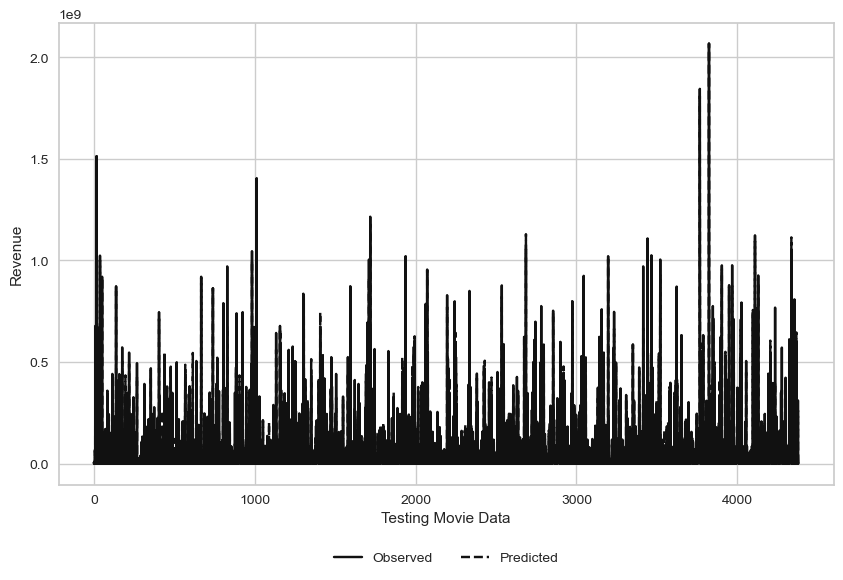

In [252]:
#Plotting the observed and predicted data
import matplotlib.pyplot as plt
#Setting the boundaries and parameters
plt.rcParams['figure.figsize'] =(10,6)
x_ax = range(len(X_test))
#Plotting
plt.plot(x_ax, y_test, label = 'Observed', color ='k', linestyle ='-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color ='k', linestyle = '--')
plt.ylabel('Revenue')
plt.xlabel('Testing Movie Data')
plt.legend(bbox_to_anchor =(0.5, -0.2), loc ='lower center', ncol =2, frameon = False)
plt.show

In [253]:
#Plotting the prediction errors and residuals using yellowbrick
# Anaconda/Cmd prompt and type : pip install yellowbrick


0.9538278231632966

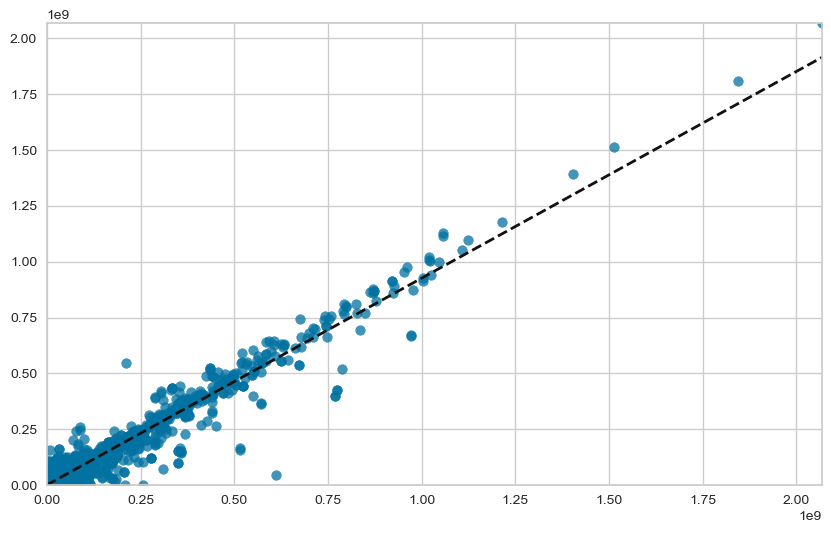

In [255]:
#Plotting the prediction errors
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
#from yellowbrick.regressor import proof
visualizer = PredictionError(Revenue_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

0.9538278231632966

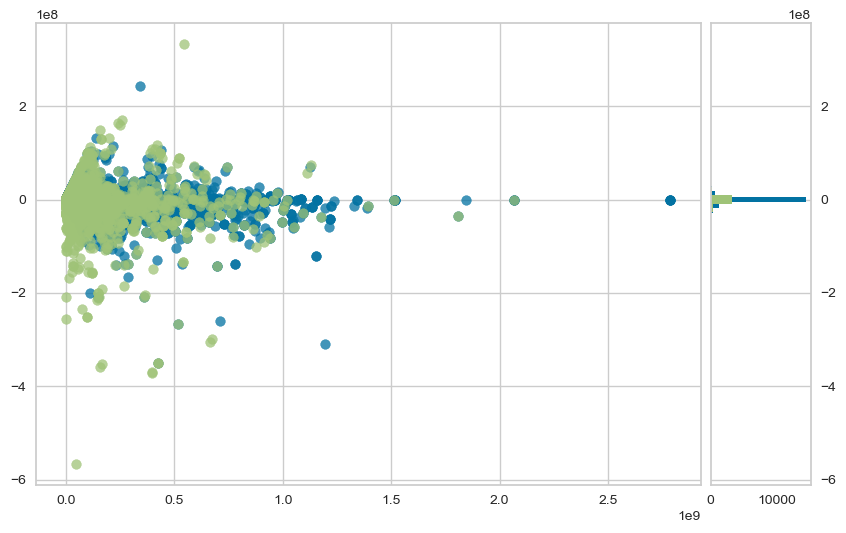

In [256]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
#from yellowbrick.regressor import proof
visualizer = ResidualsPlot(Revenue_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
#visualizer.proof()

In [257]:
# The k-folds CV
from sklearn.model_selection import cross_val_score

In [258]:
seed =7

In [259]:
# Training model CV
score_train = cross_val_score(Revenue_rf, X_train, y_train, scoring ="neg_mean_squared_error", cv=10)

In [141]:
score_train

array([-1.59273452e+15, -1.88054260e+15, -1.49955279e+15, -2.06537551e+15,
       -1.50703627e+15, -1.53786059e+15, -2.02959337e+15, -1.56701146e+15,
       -1.74838599e+15, -1.48013355e+15])

In [142]:
# The mean score
print(np.mean(score_train))

-1690822664116496.5


In [143]:
# The  absolutevmean score
from numpy import absolute
print(absolute(np.mean(score_train)))

1690822664116496.5


In [144]:
# The testing model CV
score_test = cross_val_score(Revenue_rf,X_test, y_test, scoring = 'neg_mean_squared_error', cv=10)

In [260]:
score_test

array([-3.20630873e+15, -4.95089908e+15, -5.88596698e+15, -4.83894298e+15,
       -4.64056343e+15, -3.77824124e+15, -4.02861940e+15, -5.50290831e+15,
       -3.30295126e+15, -6.13943667e+15])

In [261]:
print(absolute(np.mean(score_test)))

4627483808397857.0


In [263]:
# Random Forest Feature Ranking
#import pandas as pd
from sklearn.pipeline import Pipeline

In [266]:
f_list = list(X.columns)
f_importance = pd.Series(Revenue_rf.feature_importances_,index= f_list).sort_values(ascending =False)

In [267]:
print(f_importance)

budget                                           0.537950
popularity                                       0.182941
vote_average                                     0.052824
runtime                                          0.028678
title_Avatar                                     0.018144
                                                   ...   
title_The Great Ecstasy of Woodcarver Steiner    0.000000
title_The Great Dictator                         0.000000
title_The Great Debaters                         0.000000
title_The Grave                                  0.000000
release_date_2018-12-31                          0.000000
Length: 14112, dtype: float64


In [271]:
# List the features sorted in descending order by feature importance
feature_names = X.columns
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.5379503931317517, 'budget'),
 (0.1829406882263237, 'popularity'),
 (0.052823567071700564, 'vote_average'),
 (0.028678115621521453, 'runtime'),
 (0.018144438485976504, 'title_Avatar'),
 (0.017769129016802176, 'release_date_2009-12-10'),
 (0.006218941071903795, 'title_Star Wars: The Force Awakens'),
 (0.004162822202056064, 'title_Jurassic World'),
 (0.0021399899186231343, 'release_date_1992-11-25'),
 (0.002074503841506551, 'release_date_2009-06-29'),
 (0.001906016140219173, 'release_date_2015-12-15'),
 (0.001812661359182581, 'release_date_2015-06-09'),
 (0.0016126434762200497, 'release_date_1993-06-11'),
 (0.0015964410591434513, 'release_date_2017-06-15'),
 (0.0015677216249926856, 'title_Despicable Me 3'),
 (0.0013866356375875767, 'release_date_1982-04-03'),
 (0.0013643502992308299, 'title_The Secret Life of Pets'),
 (0.0011635823028828295, 'release_date_1951-07-03'),
 (0.0011567048248022974, 'release_date_1997-11-18'),
 (0.0011036204983476251, 'title_Beauty and the Beast'),
 (0.0011